In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona
from matplotlib import collections  as mc

In [9]:
df = pd.read_csv('../data/processed/fishtow-eda.csv', index_col = False)
df.head()

,Unnamed: 0,OPERATION_ID,ORGANISM_ID,CRUISE_ID,length,sex,maturity,OPERATION_STATUS,SITE_NAME,START_TIME,...,elon,elat,pdate,month,dist,zone,winter,sst,bth,chl
0,0,33,5688,201780,67.0,M,Resting,Representative,11-6 APR,4/17/2017 6:39:56 PM,...,-70.11847,42.42233,2017-04-17 18:39:56,4.0,0.018401,4.0,0.0,7.952941,-78.0,4.216965
1,1,89,18000,201684,73.5,F,Resting,Representative,8-32 NOV,11/25/2016 12:39:29 PM,...,-70.20686,42.21152,2016-11-25 12:39:29,11.0,0.015672,4.0,1.0,15.325490,-34.0,3.522695
2,2,33,5691,201780,52.0,M,Resting,Representative,11-6 APR,4/17/2017 6:39:56 PM,...,-70.11847,42.42233,2017-04-17 18:39:56,4.0,0.018401,4.0,0.0,7.952941,-78.0,4.216965
3,3,86,15309,201781,64.9,F,Developing,Representative,5-31 DEC,12/7/2017 3:42:34 PM,...,-70.18191,42.43383,2017-12-07 15:42:34,12.0,0.017537,4.0,1.0,10.901961,-73.0,1.154782
4,4,108,23616,201684,71.0,F,Developing,Representative,8-32 DEC,12/7/2016 4:59:07 PM,...,-70.28620,42.18056,2016-12-07 16:59:07,12.0,0.015163,4.0,1.0,12.192157,-24.0,3.050528


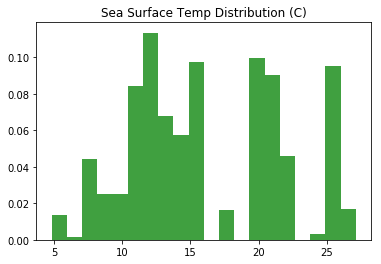

In [21]:
plt.hist( df['sst'], 20, normed=1, facecolor='green', alpha=0.75)
plt.title('Sea Surface Temp Distribution (C)')
plt.savefig( '../data/raw/sst-dist.png' )
plt.show()

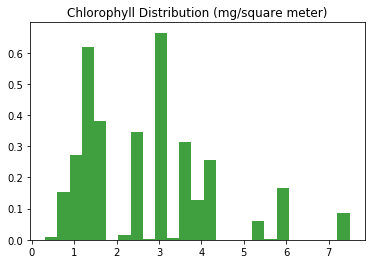

In [22]:
plt.hist( df['chl'].dropna(), 25, normed=1, facecolor='green', alpha=0.75)
plt.title('Chlorophyll Distribution (mg/square meter)')
plt.savefig( '../data/raw/chl-dist.png' )
plt.show()

In [26]:
df[df['winter']==1]['chl'].mean(), df[df['winter']==0]['chl'].mean()

(2.8602126971182784, 2.552263545434014)

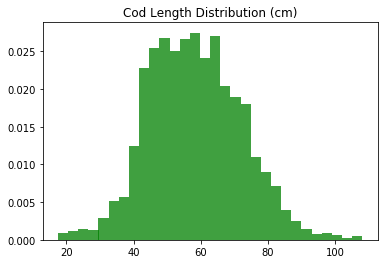

In [24]:
plt.hist( df['length'].dropna(), 30, normed=1, facecolor='green', alpha=0.75)
plt.title('Cod Length Distribution (cm)')
plt.savefig( '../data/raw/cod-length-dist.png' )
plt.show()

### map plots for eda

In [12]:
lats = [ i for i in df['slat'] ]
lons = [ i for i in df['slon'] ]

llcrnrlon = min(lons)
llcrnrlat = min(lats)
urcrnrlon = max(lons)
urcrnrlat = max(lats)
box = [ llcrnrlon, llcrnrlat, urcrnrlon, urcrnrlat ]
box

[-70.45957, 41.53001, -69.30633, 43.43869]

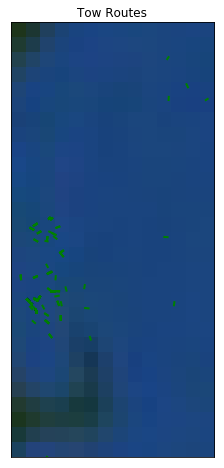

In [13]:
##plot tows with mature fish (Ripe, Ripe & Running) (fish from same tow will be plotted over)

def get_arc( row ):
    return ( 
        row['slon'], row['slat'], row['elon'], row['elat'] )

fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='cass', resolution='i', llcrnrlon=box[0], llcrnrlat=box[1],
            urcrnrlon=box[2], urcrnrlat=box[3], 
            width=8E6, height=8E6, 
            lat_0=43.260511, lon_0=-68.299058,)  #43.260511, -68.299058
m.bluemarble()

for index, row in df.iterrows():
    try:
        arc = get_arc(row)
        
        if row['maturity'] == "Ripe" or row['maturity'] == "Ripe & Running":
            m.drawgreatcircle(arc[0],arc[1],arc[2],arc[3],linewidth=2,color='g')
    except:
        pass
plt.title('Tow Routes')
plt.savefig( '../data/raw/Tow_Routes_maturefish.png' )
plt.show()

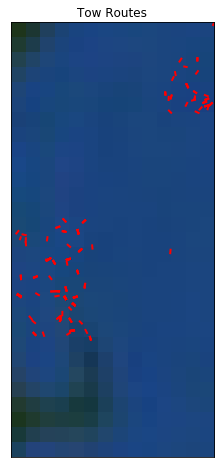

In [14]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='cass', resolution='i', llcrnrlon=box[0], llcrnrlat=box[1],
            urcrnrlon=box[2], urcrnrlat=box[3], 
            width=8E6, height=8E6, 
            lat_0=43.260511, lon_0=-68.299058,)  #43.260511, -68.299058
m.bluemarble()

for index, row in df.iterrows():
    try:
        arc = get_arc(row)
        
        if row['maturity'] == "Immature":
            m.drawgreatcircle(arc[0],arc[1],arc[2],arc[3],linewidth=2,color='r')
    except:
        pass
plt.title('Tow Routes')
plt.savefig( '../data/raw/Tow_Routes_immature.png' )
plt.show()